In [155]:
import gc
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font', family = font)
plt.rc('axes', unicode_minus=False)

### 데이터 불러오기

In [74]:
gc.collect()

96

In [3]:
def create_chunk_dic(df):
    gc.collect()
    dic = {}
    for idx, chunk in tqdm(enumerate(df)):
        dic[idx] = chunk
    return dic

In [4]:
df1 = pd.read_csv('데이터/data/01_제공데이터/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV', encoding='cp949', chunksize=1000000, low_memory=False) 
df2 = pd.read_csv('데이터/data/01_제공데이터/02-1_내국인유동인구_KOREAN.CSV', encoding='cp949', chunksize=1000000, low_memory=False) 
df3 = pd.read_csv('데이터/data/01_제공데이터/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding='cp949', chunksize=1000000, low_memory=False) 
df4 = pd.read_csv('데이터/data/01_제공데이터/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV', encoding='cp949', chunksize=1000000, low_memory=False) 
df5 = pd.read_csv('데이터/data/01_제공데이터/03_거주인구_RESIDENT_POP.CSV', encoding='cp949', chunksize=1000000, low_memory=False) 

dict1 = create_chunk_dic(df1)
dict2 = create_chunk_dic(df2)
dict3 = create_chunk_dic(df3)
dict4 = create_chunk_dic(df4)
dict5 = create_chunk_dic(df5)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [54]:
# 내국인 

ls = []
for i in tqdm(range(len(dict2.keys()))):
    ls.append(dict2[i].groupby(['base_date', 'emd_nm', 'time'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum())

concat_df = pd.concat(ls)
result = concat_df.groupby(['base_date', 'emd_nm', 'time'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum()

  0%|          | 0/48 [00:00<?, ?it/s]

In [61]:
result

resd_pop_cnt  work_pop_cnt  visit_pop_cnt
base_date  emd_nm time                                           
2018-01-01 건입동    1        8234.3087      506.5472      5123.2413
                  2        8395.8304      501.6065      5236.8215
                  3        8436.3172      477.0906      5190.2790
                  4        8449.7851      451.9721      5257.0690
                  5        8438.1201      460.2766      5436.7787
...                              ...           ...            ...
2021-06-30 효돈동    20       3403.1940      176.5715      1857.2576
                  21       3598.4514      155.6464      1776.4128
                  22       3793.2173      136.4883      1802.0158
                  23       3998.1158      121.6452      1692.6367
                  24       4939.2441       75.4621       926.5442

[1317864 rows x 3 columns]

In [58]:
local = result.groupby(['base_date', 'emd_nm'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].mean().reset_index()
local.head(10)

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,7086.222050,790.594862,7583.571650
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283
3,2018-01-01,노형동,48812.404250,2993.037633,17692.101558
4,2018-01-01,대륜동,11029.834179,831.755708,8696.705329
5,2018-01-01,대정읍,15129.413404,662.924192,6425.699187
6,2018-01-01,대천동,6321.883200,391.502608,6136.657312
7,2018-01-01,도두동,1263.143217,142.427738,4139.472429
8,2018-01-01,동홍동,15252.249963,1059.905958,6531.577117
9,2018-01-01,봉개동,3132.128871,299.778667,4120.862479


In [44]:
# 장기 외국인 유동인구

ls = []
for i in tqdm(range(len(dict3.keys()))):
    ls.append(dict3[i].groupby(['base_date', 'emd_nm', 'time'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum())

concat_df = pd.concat(ls)
frgn_long = concat_df.groupby(['base_date', 'emd_nm', 'time'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].sum()

  0%|          | 0/24 [00:00<?, ?it/s]

In [45]:
frgn_long

resd_pop_cnt  work_pop_cnt  visit_pop_cnt
base_date  emd_nm time                                           
2018-01-01 건입동    1         194.4027       30.5056       156.1608
                  2         196.6941       22.6345       148.8606
                  3         183.3233       22.6345       151.8221
                  4         188.7795       13.3501       147.8880
                  5         188.8245        7.8735       147.3685
...                              ...           ...            ...
2021-06-30 효돈동    20         47.1162        5.2404        47.4853
                  21         41.8758        5.2404        30.2029
                  22         40.3908        5.2404        25.3556
                  23         40.3908        0.0000        29.8181
                  24         52.6508        0.0000        20.0184

[1317787 rows x 3 columns]

In [60]:
frgn_long = frgn_long.groupby(['base_date', 'emd_nm'])[['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].mean().reset_index()
frgn_long.head(10)

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,186.457138,33.242263,199.084225
1,2018-01-01,구좌읍,296.994937,29.786233,137.257233
2,2018-01-01,남원읍,289.612692,42.567804,91.478800
3,2018-01-01,노형동,1830.106071,130.498129,477.952329
4,2018-01-01,대륜동,123.156583,8.990412,112.941804
5,2018-01-01,대정읍,929.724333,26.090767,217.412663
6,2018-01-01,대천동,137.988663,0.329442,105.421937
7,2018-01-01,도두동,80.606254,0.000000,52.084946
8,2018-01-01,동홍동,278.766329,38.081475,103.919946
9,2018-01-01,봉개동,63.469471,8.499708,84.413158


In [80]:
# 단기 외국인 유동인구

ls = []
for i in tqdm(range(len(dict4.keys()))):
    ls.append(dict4[i].groupby(['base_date', 'emd_nm', 'time'])[['visit_pop_cnt']].sum())

concat_df = pd.concat(ls)
frgn_short = concat_df.groupby(['base_date', 'emd_nm', 'time'])[['visit_pop_cnt']].sum()

  0%|          | 0/7 [00:00<?, ?it/s]

In [63]:
dict4[0]

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
999995,2018-07-11,2,USA,서귀포시,50130620,예래동,36.6797
999996,2018-07-11,3,CHN,제주시,50110250,한림읍,103.4277
999997,2018-07-11,3,ETC,제주시,50110250,한림읍,43.8580
999998,2018-07-11,3,HKG,제주시,50110250,한림읍,12.8618


In [89]:
frgn_short = frgn_short.groupby(['base_date','emd_nm'])[['visit_pop_cnt']].mean().reset_index()

In [84]:
# 거주인구 
pop = dict5[0].groupby(['base_year','base_month','emd_nm'])[['resid_reg_pop','foreign_pop']].sum().reset_index()
pop

,base_year,base_month,emd_nm,resid_reg_pop,foreign_pop
0,2018,1,건입동,9800,228
1,2018,1,구좌읍,15574,552
2,2018,1,남원읍,19112,628
3,2018,1,노형동,53369,1589
4,2018,1,대륜동,13473,178
...,...,...,...,...,...
1801,2021,6,표선면,12347,334
1802,2021,6,한경면,9158,337
1803,2021,6,한림읍,21232,3230
1804,2021,6,화북동,24300,330


In [136]:
# 음쓰 

ls = []
for i in tqdm(range(len(dict1.keys()))):
    ls.append(dict1[i].groupby(['base_date','emd_nm'])[['em_cnt','em_g','pay_amt']].sum())
    
concat_df = pd.concat(ls)
food_waste = concat_df.groupby(['base_date','emd_nm'])[['em_cnt','em_g','pay_amt']].sum()

  0%|          | 0/3 [00:00<?, ?it/s]

In [138]:
food_waste = food_waste.reset_index()

### 데이터 합치기

>visit,work,resid 합치기 전

In [110]:
# 장기 단기 합치기

In [101]:
frgn_long.rename(columns = {'visit_pop_cnt': 'long_visit_pop_cnt'} , inplace = True)
frgn_long

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,long_visit_pop_cnt
0,2018-01-01,건입동,186.457138,33.242263,199.084225
1,2018-01-01,구좌읍,296.994937,29.786233,137.257233
2,2018-01-01,남원읍,289.612692,42.567804,91.478800
3,2018-01-01,노형동,1830.106071,130.498129,477.952329
4,2018-01-01,대륜동,123.156583,8.990412,112.941804
...,...,...,...,...,...
54906,2021-06-30,표선면,165.981929,22.403079,138.107417
54907,2021-06-30,한경면,278.029708,12.591437,230.960871
54908,2021-06-30,한림읍,1022.291396,58.705592,615.770200
54909,2021-06-30,화북동,258.198821,34.253275,92.836525


In [103]:
frgn_short.rename(columns = {'visit_pop_cnt' : 'short_visit_pop_cnt'} , inplace = True)
frgn_short

,base_date,emd_nm,short_visit_pop_cnt
0,2018-01-01,건입동,199.048442
1,2018-01-01,구좌읍,98.635696
2,2018-01-01,남원읍,148.013617
3,2018-01-01,노형동,402.251492
4,2018-01-01,대륜동,56.127004
...,...,...,...
53711,2021-06-30,표선면,3.744175
53712,2021-06-30,한경면,0.734759
53713,2021-06-30,한림읍,3.038687
53714,2021-06-30,화북동,1.825729


In [106]:
frgn_data = pd.merge(frgn_long, frgn_short , on = ('base_date' , 'emd_nm') , how = 'outer')
frgn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54911 entries, 0 to 54910
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_date            54911 non-null  object 
 1   emd_nm               54911 non-null  object 
 2   resd_pop_cnt         54911 non-null  float64
 3   work_pop_cnt         54911 non-null  float64
 4   long_visit_pop_cnt   54911 non-null  float64
 5   short_visit_pop_cnt  53716 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.9+ MB


In [108]:
frgn = frgn_data.fillna(0)
frgn.query('short_visit_pop_cnt == 0')

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,long_visit_pop_cnt,short_visit_pop_cnt
3423,2018-03-21,우도면,7.159996,0.000000,8.498271,0.0
33011,2020-02-07,일도1동,18.406817,0.000000,23.000729,0.0
33054,2020-02-08,일도1동,20.164254,0.198508,21.154371,0.0
33140,2020-02-10,일도1동,19.971629,0.264104,27.097767,0.0
33226,2020-02-12,일도1동,25.711542,0.000000,27.520813,0.0
...,...,...,...,...,...,...
54806,2021-06-28,용담1동,45.836600,2.559158,42.524921,0.0
54824,2021-06-28,효돈동,41.313704,4.738050,34.387246,0.0
54832,2021-06-29,도두동,50.909408,15.968329,110.431471,0.0
54849,2021-06-29,용담1동,45.528650,3.907292,46.105796,0.0


In [109]:
frgn

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,long_visit_pop_cnt,short_visit_pop_cnt
0,2018-01-01,건입동,186.457138,33.242263,199.084225,199.048442
1,2018-01-01,구좌읍,296.994937,29.786233,137.257233,98.635696
2,2018-01-01,남원읍,289.612692,42.567804,91.478800,148.013617
3,2018-01-01,노형동,1830.106071,130.498129,477.952329,402.251492
4,2018-01-01,대륜동,123.156583,8.990412,112.941804,56.127004
...,...,...,...,...,...,...
54906,2021-06-30,표선면,165.981929,22.403079,138.107417,3.744175
54907,2021-06-30,한경면,278.029708,12.591437,230.960871,0.734759
54908,2021-06-30,한림읍,1022.291396,58.705592,615.770200,3.038687
54909,2021-06-30,화북동,258.198821,34.253275,92.836525,1.825729


In [118]:
# 내국 외국 유동인구 합치기

local.rename(columns = {'resd_pop_cnt' : 'local_resd_pop' , 'work_pop_cnt':'local_work_pop' ,'visit_pop_cnt' : 'local_visit_pop'}, inplace = True)
local

,base_date,emd_nm,local_resd_pop,local_work_pop,local_visit_pop
0,2018-01-01,건입동,7086.222050,790.594862,7583.571650
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283
3,2018-01-01,노형동,48812.404250,2993.037633,17692.101558
4,2018-01-01,대륜동,11029.834179,831.755708,8696.705329
...,...,...,...,...,...
54906,2021-06-30,표선면,9970.182508,980.039933,6585.483442
54907,2021-06-30,한경면,6975.744213,667.900937,4106.926950
54908,2021-06-30,한림읍,19603.540783,2049.712771,11956.299983
54909,2021-06-30,화북동,23854.191400,2089.692246,10043.682913


In [119]:
frgn.rename(columns = {'resd_pop_cnt' : 'frgn_resd_pop' , 'work_pop_cnt':'frgn_work_pop' ,'long_visit_pop_cnt' : 'frgn_long_visit' ,'short_visit_pop_cnt' : 'frgn_short_visit'}, inplace = True)

In [141]:
total =  pd.merge(local, frgn , on = ('base_date' , 'emd_nm') , how = 'outer')
total

,base_date,emd_nm,local_resd_pop,local_work_pop,local_visit_pop,frgn_resd_pop,frgn_work_pop,frgn_long_visit,frgn_short_visit
0,2018-01-01,건입동,7086.222050,790.594862,7583.571650,186.457138,33.242263,199.084225,199.048442
1,2018-01-01,구좌읍,11212.172696,701.134825,10101.778808,296.994937,29.786233,137.257233,98.635696
2,2018-01-01,남원읍,11852.424667,738.437638,8910.043283,289.612692,42.567804,91.478800,148.013617
3,2018-01-01,노형동,48812.404250,2993.037633,17692.101558,1830.106071,130.498129,477.952329,402.251492
4,2018-01-01,대륜동,11029.834179,831.755708,8696.705329,123.156583,8.990412,112.941804,56.127004
...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,표선면,9970.182508,980.039933,6585.483442,165.981929,22.403079,138.107417,3.744175
54907,2021-06-30,한경면,6975.744213,667.900937,4106.926950,278.029708,12.591437,230.960871,0.734759
54908,2021-06-30,한림읍,19603.540783,2049.712771,11956.299983,1022.291396,58.705592,615.770200,3.038687
54909,2021-06-30,화북동,23854.191400,2089.692246,10043.682913,258.198821,34.253275,92.836525,1.825729


In [143]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54911 entries, 0 to 54910
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   base_date         54911 non-null  object 
 1   emd_nm            54911 non-null  object 
 2   local_resd_pop    54911 non-null  float64
 3   local_work_pop    54911 non-null  float64
 4   local_visit_pop   54911 non-null  float64
 5   frgn_resd_pop     54911 non-null  float64
 6   frgn_work_pop     54911 non-null  float64
 7   frgn_long_visit   54911 non-null  float64
 8   frgn_short_visit  54911 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.2+ MB


In [146]:
food_waste

,base_date,emd_nm,em_cnt,em_g,pay_amt
0,2018-01-01,건입동,668,1708250,51079
1,2018-01-01,남원읍,304,1239600,37110
2,2018-01-01,노형동,3903,9357900,278317
3,2018-01-01,대륜동,650,1717700,50076
4,2018-01-01,대정읍,309,1264950,37872
...,...,...,...,...,...
50517,2021-06-30,표선면,370,1377450,41235
50518,2021-06-30,한경면,269,973850,29152
50519,2021-06-30,한림읍,870,3298100,98740
50520,2021-06-30,화북동,2255,3749600,111933


In [148]:
# 음쓰랑 합치기

cor1 = pd.merge(food_waste, total , on = ('base_date' , 'emd_nm') , how = 'outer')
cor1

,base_date,emd_nm,em_cnt,em_g,pay_amt,local_resd_pop,local_work_pop,local_visit_pop,frgn_resd_pop,frgn_work_pop,frgn_long_visit,frgn_short_visit
0,2018-01-01,건입동,668.0,1708250.0,51079.0,7086.222050,790.594862,7583.571650,186.457138,33.242263,199.084225,199.048442
1,2018-01-01,남원읍,304.0,1239600.0,37110.0,11852.424667,738.437638,8910.043283,289.612692,42.567804,91.478800,148.013617
2,2018-01-01,노형동,3903.0,9357900.0,278317.0,48812.404250,2993.037633,17692.101558,1830.106071,130.498129,477.952329,402.251492
3,2018-01-01,대륜동,650.0,1717700.0,50076.0,11029.834179,831.755708,8696.705329,123.156583,8.990412,112.941804,56.127004
4,2018-01-01,대정읍,309.0,1264950.0,37872.0,15129.413404,662.924192,6425.699187,929.724333,26.090767,217.412663,82.834500
...,...,...,...,...,...,...,...,...,...,...,...,...
55819,2021-06-29,일도1동,NaN,NaN,NaN,1146.885925,263.414108,2525.895171,35.814637,13.596888,96.290604,0.318725
55820,2021-06-29,추자면,NaN,NaN,NaN,1345.102588,69.541167,1186.797954,16.942854,4.561921,189.994517,4.932238
55821,2021-06-30,우도면,NaN,NaN,NaN,1357.039712,119.652796,1940.923783,16.540150,1.186125,183.590312,10.944642
55822,2021-06-30,일도1동,NaN,NaN,NaN,1188.960204,257.388762,2552.870283,32.673871,7.275642,119.337608,0.338121


In [150]:
cor1 = cor1[cor1['em_g'].notna()]
cor1

,base_date,emd_nm,em_cnt,em_g,pay_amt,local_resd_pop,local_work_pop,local_visit_pop,frgn_resd_pop,frgn_work_pop,frgn_long_visit,frgn_short_visit
0,2018-01-01,건입동,668.0,1708250.0,51079.0,7086.222050,790.594862,7583.571650,186.457138,33.242263,199.084225,199.048442
1,2018-01-01,남원읍,304.0,1239600.0,37110.0,11852.424667,738.437638,8910.043283,289.612692,42.567804,91.478800,148.013617
2,2018-01-01,노형동,3903.0,9357900.0,278317.0,48812.404250,2993.037633,17692.101558,1830.106071,130.498129,477.952329,402.251492
3,2018-01-01,대륜동,650.0,1717700.0,50076.0,11029.834179,831.755708,8696.705329,123.156583,8.990412,112.941804,56.127004
4,2018-01-01,대정읍,309.0,1264950.0,37872.0,15129.413404,662.924192,6425.699187,929.724333,26.090767,217.412663,82.834500
...,...,...,...,...,...,...,...,...,...,...,...,...
50517,2021-06-30,표선면,370.0,1377450.0,41235.0,9970.182508,980.039933,6585.483442,165.981929,22.403079,138.107417,3.744175
50518,2021-06-30,한경면,269.0,973850.0,29152.0,6975.744213,667.900937,4106.926950,278.029708,12.591437,230.960871,0.734759
50519,2021-06-30,한림읍,870.0,3298100.0,98740.0,19603.540783,2049.712771,11956.299983,1022.291396,58.705592,615.770200,3.038687
50520,2021-06-30,화북동,2255.0,3749600.0,111933.0,23854.191400,2089.692246,10043.682913,258.198821,34.253275,92.836525,1.825729


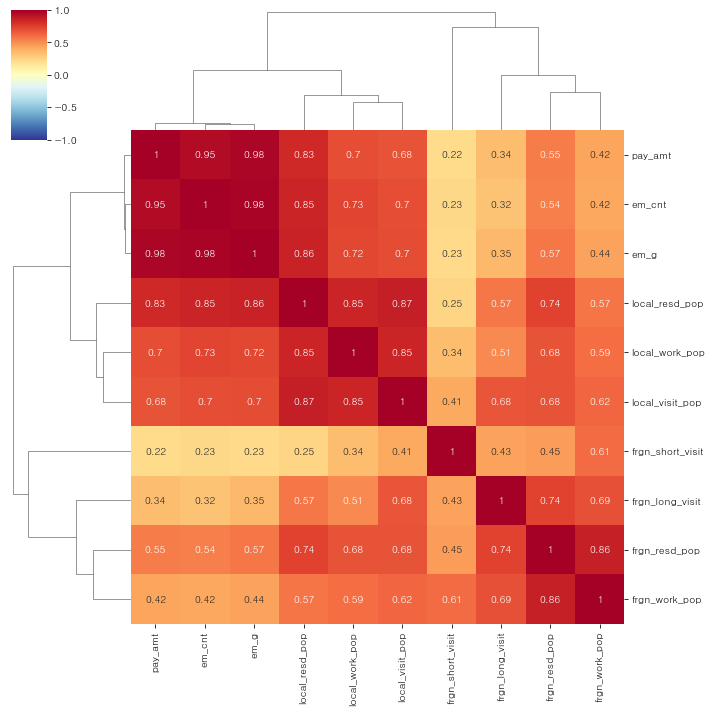

In [158]:
# 그 무엇도 합치지 않은 데이터

df = cor1.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [159]:
df

,em_cnt,em_g,pay_amt,local_resd_pop,local_work_pop,local_visit_pop,frgn_resd_pop,frgn_work_pop,frgn_long_visit,frgn_short_visit
em_cnt,1.000000,0.980187,0.953063,0.851257,0.727597,0.696607,0.540694,0.420750,0.317984,0.226771
em_g,0.980187,1.000000,0.975705,0.856880,0.720439,0.703264,0.565044,0.435761,0.353175,0.226155
pay_amt,0.953063,0.975705,1.000000,0.834594,0.701641,0.684732,0.549808,0.423382,0.342721,0.218262
local_resd_pop,0.851257,0.856880,0.834594,1.000000,0.849439,0.869489,0.738869,0.572965,0.568064,0.245632
local_work_pop,0.727597,0.720439,0.701641,0.849439,1.000000,0.849042,0.683285,0.594558,0.513004,0.338794
local_visit_pop,0.696607,0.703264,0.684732,0.869489,0.849042,1.000000,0.681008,0.622181,0.678984,0.410579
frgn_resd_pop,0.540694,0.565044,0.549808,0.738869,0.683285,0.681008,1.000000,0.864566,0.736331,0.445345
frgn_work_pop,0.420750,0.435761,0.423382,0.572965,0.594558,0.622181,0.864566,1.000000,0.691299,0.608483
frgn_long_visit,0.317984,0.353175,0.342721,0.568064,0.513004,0.678984,0.736331,0.691299,1.000000,0.430334
frgn_short_visit,0.226771,0.226155,0.218262,0.245632,0.338794,0.410579,0.445345,0.608483,0.430334,1.000000


>em_g 기준으로 
 - em_cnt (0.98) , pay_amt (0.97) 이 가장 높은데 당연한것!  
 - 인구만 봤을 땐 local_resd_pop (0.85) 로 가장 높고 frgn_short_visit 이 가장 적다.   
 - 국내_거주_인구 > 국내_근무_인구 > 국내_방문_인구 > 외국_거주_인구 > 외국_근무_인구 > 외국_장기방문_인구 > 외국_단기방문_인구
 
 - 근무, 거주, 방문 <-> 배출량  결과랑 비슷한지 비교해보기

>visit,work,resd 합쳐보기

In [171]:
local['local_total'] = local['local_resd_pop'] + local['local_work_pop'] + local['local_visit_pop']
new_local = local[['base_date','emd_nm','local_total']]
new_local

,base_date,emd_nm,local_total
0,2018-01-01,건입동,15460.388563
1,2018-01-01,구좌읍,22015.086329
2,2018-01-01,남원읍,21500.905587
3,2018-01-01,노형동,69497.543442
4,2018-01-01,대륜동,20558.295217
...,...,...,...
54906,2021-06-30,표선면,17535.705883
54907,2021-06-30,한경면,11750.572100
54908,2021-06-30,한림읍,33609.553537
54909,2021-06-30,화북동,35987.566558


In [174]:
frgn['frgn_total'] = frgn['frgn_resd_pop'] + frgn['frgn_work_pop'] + frgn['frgn_long_visit'] + frgn['frgn_short_visit']
new_frgn = frgn[['base_date', 'emd_nm','frgn_total']]
new_frgn

,base_date,emd_nm,frgn_total
0,2018-01-01,건입동,617.832067
1,2018-01-01,구좌읍,562.674100
2,2018-01-01,남원읍,571.672912
3,2018-01-01,노형동,2840.808021
4,2018-01-01,대륜동,301.215804
...,...,...,...
54906,2021-06-30,표선면,330.236600
54907,2021-06-30,한경면,522.316775
54908,2021-06-30,한림읍,1699.805875
54909,2021-06-30,화북동,387.114350


In [176]:
new_total = pd.merge(new_local, new_frgn , on = ('base_date' , 'emd_nm') , how = 'outer')
new_total

,base_date,emd_nm,local_total,frgn_total
0,2018-01-01,건입동,15460.388563,617.832067
1,2018-01-01,구좌읍,22015.086329,562.674100
2,2018-01-01,남원읍,21500.905587,571.672912
3,2018-01-01,노형동,69497.543442,2840.808021
4,2018-01-01,대륜동,20558.295217,301.215804
...,...,...,...,...
54906,2021-06-30,표선면,17535.705883,330.236600
54907,2021-06-30,한경면,11750.572100,522.316775
54908,2021-06-30,한림읍,33609.553537,1699.805875
54909,2021-06-30,화북동,35987.566558,387.114350


In [178]:
cor2 = pd.merge(food_waste, new_total , on = ('base_date' , 'emd_nm') , how = 'outer')
cor2 = cor2[cor2['em_g'].notna()]
cor2

,base_date,emd_nm,em_cnt,em_g,pay_amt,local_total,frgn_total
0,2018-01-01,건입동,668.0,1708250.0,51079.0,15460.388563,617.832067
1,2018-01-01,남원읍,304.0,1239600.0,37110.0,21500.905587,571.672912
2,2018-01-01,노형동,3903.0,9357900.0,278317.0,69497.543442,2840.808021
3,2018-01-01,대륜동,650.0,1717700.0,50076.0,20558.295217,301.215804
4,2018-01-01,대정읍,309.0,1264950.0,37872.0,22218.036783,1256.062263
...,...,...,...,...,...,...,...
50517,2021-06-30,표선면,370.0,1377450.0,41235.0,17535.705883,330.236600
50518,2021-06-30,한경면,269.0,973850.0,29152.0,11750.572100,522.316775
50519,2021-06-30,한림읍,870.0,3298100.0,98740.0,33609.553537,1699.805875
50520,2021-06-30,화북동,2255.0,3749600.0,111933.0,35987.566558,387.114350


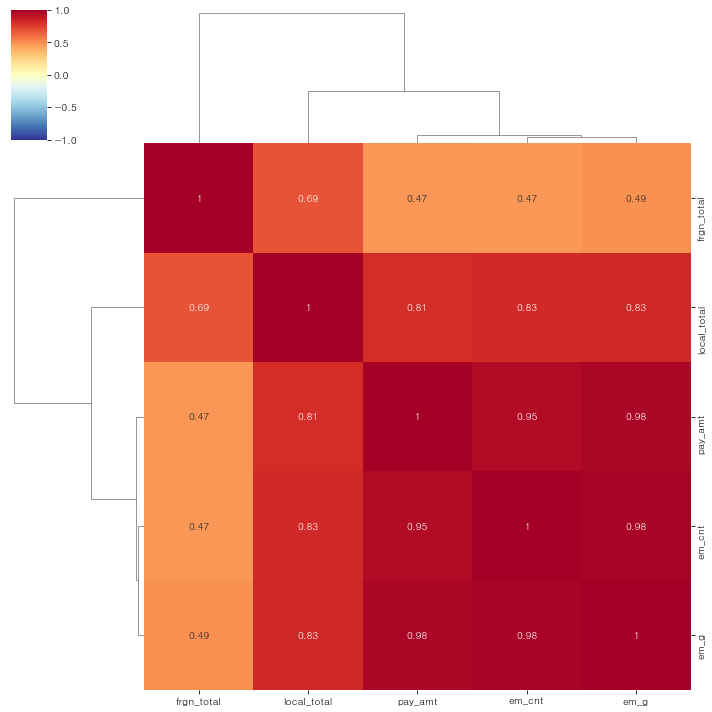

In [179]:
# visit, work, resd 외국 내국별로 합한 데이터

df = cor2.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

> em_g 기준으로 
 - local_total 과는 높은 상관관계 , frgn_total 은 낮음

>거주인구 데이터 <-> 배출량

In [201]:
# 거주인구가 년,월 로만 되어 있어서 바꿔줌

# fwt = pd.to_datetime(food_waste.base_date)

food_waste['base_year'] = fwt.dt.year 
food_waste['base_month'] = fwt.dt.month
food_waste['date'] = fwt.dt.day

# food_waste.drop(['base_date'] , axis = 'columns' , inplace = True)
new_foodwaste = food_waste.groupby(['base_year','base_month','emd_nm'])[['em_cnt','em_g','pay_amt']].sum().reset_index()
new_foodwaste

,base_year,base_month,emd_nm,em_cnt,em_g,pay_amt
0,2018,1,건입동,18416,45646550,1364804
1,2018,1,남원읍,9570,42437700,1270773
2,2018,1,노형동,113990,265018400,7883340
3,2018,1,대륜동,21666,57612600,1676850
4,2018,1,대정읍,10185,38885550,1164122
...,...,...,...,...,...,...
1661,2021,6,표선면,10751,42453750,1271419
1662,2021,6,한경면,8031,27060150,809898
1663,2021,6,한림읍,25653,82746990,2476292
1664,2021,6,화북동,66088,110750050,3306029


In [205]:
pop
cor3 = pd.merge(new_foodwaste, pop , on = ('base_year' , 'base_month' ,'emd_nm') , how = 'outer')
cor3 = cor3[cor3['em_g'].notna()]
cor3

,base_year,base_month,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop
0,2018,1,건입동,18416.0,45646550.0,1364804.0,9800.0,228.0
1,2018,1,남원읍,9570.0,42437700.0,1270773.0,19112.0,628.0
2,2018,1,노형동,113990.0,265018400.0,7883340.0,53369.0,1589.0
3,2018,1,대륜동,21666.0,57612600.0,1676850.0,13473.0,178.0
4,2018,1,대정읍,10185.0,38885550.0,1164122.0,21085.0,1518.0
...,...,...,...,...,...,...,...,...
1661,2021,6,표선면,10751.0,42453750.0,1271419.0,12347.0,334.0
1662,2021,6,한경면,8031.0,27060150.0,809898.0,9158.0,337.0
1663,2021,6,한림읍,25653.0,82746990.0,2476292.0,21232.0,3230.0
1664,2021,6,화북동,66088.0,110750050.0,3306029.0,24300.0,330.0


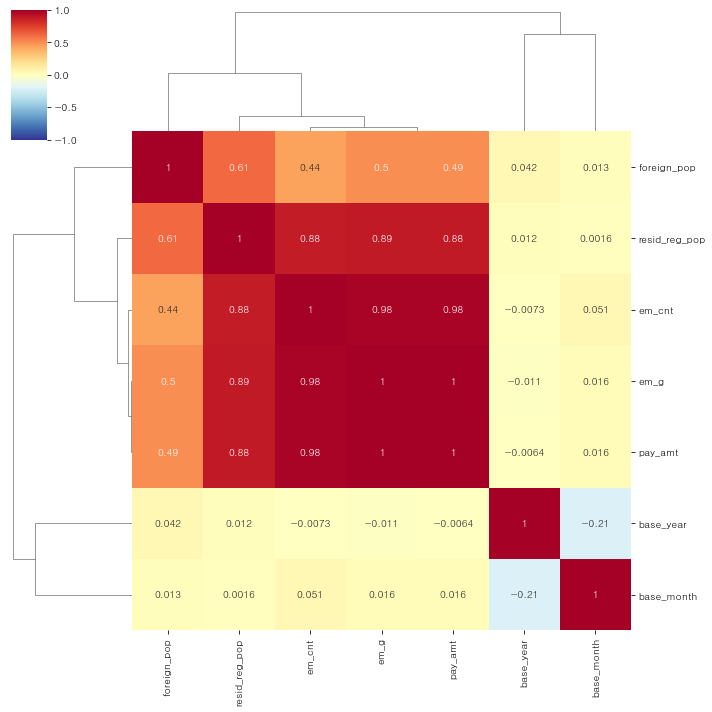

In [206]:
# 거주인구(내외국인) 데이터 <-> 음쓰배출량

df = cor3.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

>마찬가지로 내국인 거주인구와 상관계수가 높다. 

In [210]:
# 동별로 

cor2.groupby('emd_nm')

In [211]:
cor2

,base_date,emd_nm,em_cnt,em_g,pay_amt,local_total,frgn_total
0,2018-01-01,건입동,668.0,1708250.0,51079.0,15460.388563,617.832067
1,2018-01-01,남원읍,304.0,1239600.0,37110.0,21500.905587,571.672912
2,2018-01-01,노형동,3903.0,9357900.0,278317.0,69497.543442,2840.808021
3,2018-01-01,대륜동,650.0,1717700.0,50076.0,20558.295217,301.215804
4,2018-01-01,대정읍,309.0,1264950.0,37872.0,22218.036783,1256.062263
...,...,...,...,...,...,...,...
50517,2021-06-30,표선면,370.0,1377450.0,41235.0,17535.705883,330.236600
50518,2021-06-30,한경면,269.0,973850.0,29152.0,11750.572100,522.316775
50519,2021-06-30,한림읍,870.0,3298100.0,98740.0,33609.553537,1699.805875
50520,2021-06-30,화북동,2255.0,3749600.0,111933.0,35987.566558,387.114350
